In [5]:
import pandas as pd
MyData=pd.read_csv("data.csv")
MyData

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [6]:
from numpy import array
from sklearn.preprocessing import LabelEncoder
values1 =array(MyData["race/ethnicity"])
values2 =array(MyData["parental level of education"])
values3 =array(MyData["lunch"])
values4 =array(MyData["test preparation course"])
values5 =array(MyData["gender"])
MyData=MyData.drop(columns=["race/ethnicity","parental level of education","parental level of education","test preparation course","lunch","gender"]) 

label_encoder = LabelEncoder()
integer_encoded1 = label_encoder.fit_transform(values1)
integer_encoded2 = label_encoder.fit_transform(values2)
integer_encoded3 = label_encoder.fit_transform(values3)
integer_encoded4 = label_encoder.fit_transform(values4)
integer_encoded5 = label_encoder.fit_transform(values5)
values1=pd.DataFrame(integer_encoded1)
values2=pd.DataFrame(integer_encoded2)
values3=pd.DataFrame(integer_encoded3)
values4=pd.DataFrame(integer_encoded4)
values5=pd.DataFrame(integer_encoded5)
result = pd.concat([values1, MyData], axis=1, join='inner')
result.rename(columns={0:"race/ethnicity"}, inplace=True)
result = pd.concat([values2, result], axis=1, join='inner')
result.rename(columns={0:"parental level of education"}, inplace=True)
result = pd.concat([values3, result], axis=1, join='inner')
result.rename(columns={0:"test preparation course"}, inplace=True)
result = pd.concat([values4, result], axis=1, join='inner')
result.rename(columns={0:"lunch"}, inplace=True)
result = pd.concat([values5, result], axis=1, join='inner')
result.rename(columns={0:"gender"}, inplace=True)

In [8]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(result, test_size=0.2, random_state=42)
y_train=train_set["race/ethnicity"]
X_train=train_set.drop(['race/ethnicity'], axis=1)
y_test=test_set["race/ethnicity"]
X_test=test_set.drop(['race/ethnicity'], axis=1)

In [34]:
y_train_D = (y_train ==4)
y_test_D = (y_test == 4)

In [35]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_D)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [36]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_D, cv=3, scoring="accuracy")

array([0.85393258, 0.85393258, 0.84962406])

In [37]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_D, cv=3)

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_D, y_train_pred)

array([[677,   7],
       [111,   5]], dtype=int64)

In [39]:
from sklearn.metrics import precision_score, recall_score
print("precision_score is :",precision_score(y_train_D, y_train_pred))
print("recall_score :",recall_score(y_train_D, y_train_pred))

precision_score is : 0.4166666666666667
recall_score : 0.04310344827586207


In [40]:
from sklearn.metrics import f1_score
f1_score(y_train_D, y_train_pred)


0.07812500000000001

In [41]:
sgd_clf.fit(X_train, y_train) # y_train, not y_train_5
WithoutGroup=result.drop(columns=["race/ethnicity"])
sgd_clf.predict(WithoutGroup)

array([1, 1, 1, 1, 0, 1, 1, 0, 3, 1, 1, 1, 1, 0, 3, 3, 1, 1, 3, 1, 1, 1,
       1, 1, 3, 0, 0, 3, 0, 3, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 3, 0,
       1, 3, 1, 3, 1, 1, 0, 4, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 3, 3, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 3, 1, 0, 1, 3, 1,
       1, 1, 1, 3, 1, 3, 3, 1, 0, 1, 1, 1, 0, 1, 1, 0, 3, 3, 1, 1, 1, 3,
       3, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 3, 0, 3, 1, 3, 3, 1, 0, 1, 3, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 3, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 3, 0, 1, 1, 0, 0,
       3, 1, 1, 1, 1, 1, 0, 3, 4, 0, 1, 3, 0, 0, 1, 3, 0, 0, 1, 1, 1, 0,
       3, 0, 1, 0, 3, 1, 1, 3, 0, 1, 0, 1, 1, 0, 1, 1, 1, 3, 0, 1, 0, 1,
       3, 0, 0, 4, 4, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 3, 1, 1, 0, 3, 1,
       0, 0, 3, 3, 1, 0, 1, 0, 3, 1, 0, 0, 1, 3, 1, 4, 0, 1, 3, 1, 1, 1,
       3, 1, 0, 0, 1, 0, 0, 1, 3, 1, 0, 1, 3, 0, 3,

In [42]:
import numpy as np
some_digit_scores = sgd_clf.decision_function(WithoutGroup)
np.argmax(some_digit_scores)
some_digit_scores

array([[-1689.07020013, -1284.7364519 , -2592.52266583, -1475.90571958,
        -2065.7813898 ],
       [-1612.84234678, -1106.86732405, -2650.33134164, -1965.6329739 ,
        -3196.6755951 ],
       [-1807.37431908, -1521.69765667, -3413.10555746, -2129.49845467,
        -2571.02933949],
       ...,
       [-1040.19003258,  -799.74662997, -2326.30245231, -2005.50898443,
        -1876.9685171 ],
       [-1355.6676831 , -1131.37373722, -2595.22540911, -1726.53267638,
        -2541.00058554],
       [-1621.71043863, -1358.25569141, -3020.6071716 , -1633.07327671,
        -2800.21105595]])

In [43]:
sgd_clf.classes_
sgd_clf.classes_[4]

4

In [44]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)
forest_clf.predict(WithoutGroup)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([1, 2, 1, 0, 2, 1, 1, 1, 3, 1, 2, 3, 1, 0, 0, 2, 2, 1, 2, 2, 3, 1,
       3, 4, 3, 3, 1, 2, 2, 3, 4, 1, 4, 3, 4, 4, 3, 3, 3, 2, 2, 2, 1, 1,
       3, 1, 0, 2, 3, 2, 4, 4, 2, 3, 3, 2, 4, 3, 3, 1, 4, 0, 0, 2, 3, 1,
       0, 2, 1, 2, 2, 3, 3, 2, 2, 1, 1, 0, 1, 4, 1, 1, 0, 4, 3, 2, 3, 3,
       2, 3, 2, 2, 2, 2, 1, 2, 0, 4, 3, 2, 1, 2, 3, 1, 2, 2, 3, 3, 1, 1,
       2, 2, 0, 3, 4, 2, 1, 3, 3, 2, 3, 1, 2, 3, 4, 1, 1, 3, 3, 0, 3, 2,
       4, 2, 3, 2, 2, 1, 2, 3, 3, 2, 4, 0, 2, 2, 1, 2, 3, 4, 0, 0, 1, 3,
       3, 2, 4, 1, 2, 3, 1, 4, 1, 2, 4, 2, 2, 1, 2, 2, 0, 4, 3, 2, 1, 2,
       1, 2, 1, 3, 2, 2, 4, 2, 2, 2, 4, 1, 1, 2, 4, 3, 1, 3, 2, 3, 2, 4,
       4, 3, 2, 3, 2, 1, 2, 3, 4, 4, 3, 2, 3, 2, 2, 2, 4, 4, 4, 2, 3, 1,
       3, 1, 2, 3, 1, 4, 2, 3, 0, 2, 3, 2, 1, 4, 2, 3, 3, 3, 1, 2, 3, 4,
       3, 4, 3, 2, 4, 1, 1, 2, 0, 3, 1, 3, 1, 4, 2, 2, 1, 3, 1, 2, 2, 4,
       3, 0, 2, 3, 3, 4, 2, 2, 3, 3, 1, 2, 2, 2, 2, 1, 2, 1, 3, 3, 1, 1,
       4, 1, 1, 2, 2, 3, 1, 4, 2, 1, 2, 4, 2, 1, 0,

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.25      , 0.29588015, 0.32075472])

In [46]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[  2,  17,  25,  14,  11],
       [ 12,  28,  60,  35,  18],
       [ 11,  46, 109,  64,  30],
       [ 13,  26,  91,  60,  12],
       [  6,  25,  34,  19,  32]], dtype=int64)

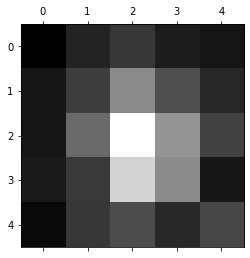

In [47]:
import matplotlib.pyplot as plt
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

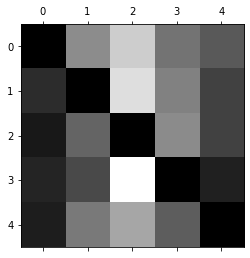

In [48]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()